# **1. Entendimiento del Negocio**

La unidad de psicología de un hospital universitario quiere entender los patrones y efectos sobre el uso de SmartPhones entre los jóvenes, haciendo un enfoque especial en entender niveles de adicción al uso de este tipo de dispositivos. La intención es entonces conocer cuáles pueden ser los efectos en cuanto a la posibilidad de desarrollar niveles de adicción.

# **2. Enfoque Analítico**

Desarrollar un experimento de clasificación que permita determinar los niveles de adicción de jóvenes con un nivel de desempeño superior al 85%

# **3. Requerimiento de Datos**

- Datos comportamentales
- Datos demográficos
- Datos de hábitos
- Nivel de adicción

# **4. Recolección de los Datos**

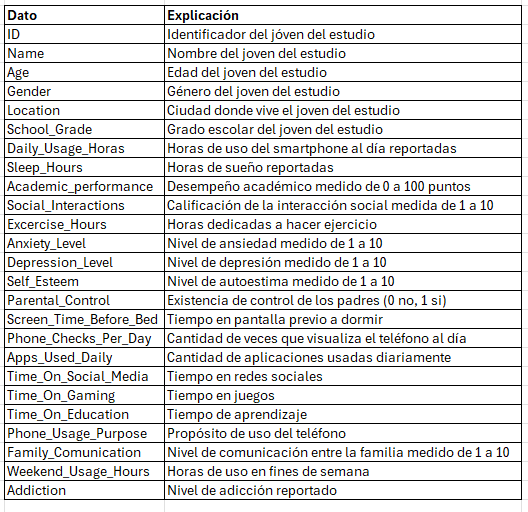

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##Importación de los datos
data = pd.read_csv('Datos/data_clf.csv')
data

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78.0,5.0,...,1.4,86,19.0,3.6,1.7,1.2,Browsing,4.0,8.7,High
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70.0,5.0,...,0.9,96,9.0,1.1,4.0,1.8,Browsing,2.0,5.3,High
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93.0,8.0,...,0.5,137,8.0,0.3,1.5,0.4,Education,6.0,5.7,High
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78.0,8.0,...,1.4,128,7.0,3.1,1.6,0.8,Social Media,8.0,3.0,High
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56.0,4.0,...,1.0,96,20.0,2.6,0.9,1.1,Gaming,10.0,3.7,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53.0,4.0,...,0.3,80,15.0,2.7,1.8,1.0,NaN,8.0,9.4,High
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93.0,5.0,...,0.9,45,8.0,3.1,0.0,0.3,Gaming,9.0,5.2,Medium
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98.0,1.0,...,0.2,51,13.0,2.4,0.2,2.4,Social Media,9.0,5.9,Medium
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67.0,3.0,...,1.6,125,17.0,1.7,2.6,1.5,Browsing,4.0,6.1,High


# **5. Entendimiento de los datos**

- Datos nulos
- Estadísticas univariada, bivariada y multivariada
- Desbalance de y

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
#Identificación de datos nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       2900 non-null   float64
 7   Sleep_Hours             2900 non-null   float64
 8   Academic_Performance    2900 non-null   float64
 9   Social_Interactions     2900 non-null   float64
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           2900 non-null   float64
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        2900 non-null   

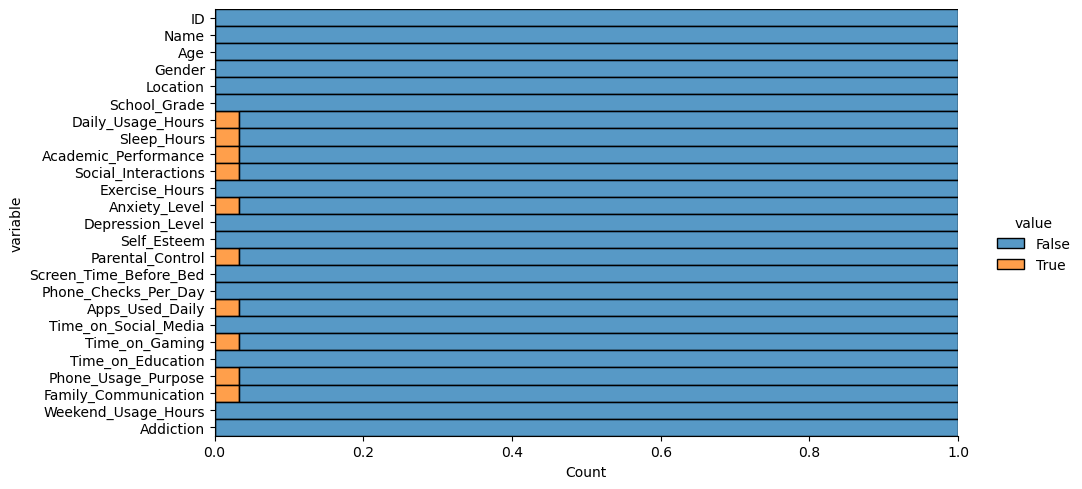

In [4]:
#Visualizar la proporción de datos nulos por variable
data.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.show()

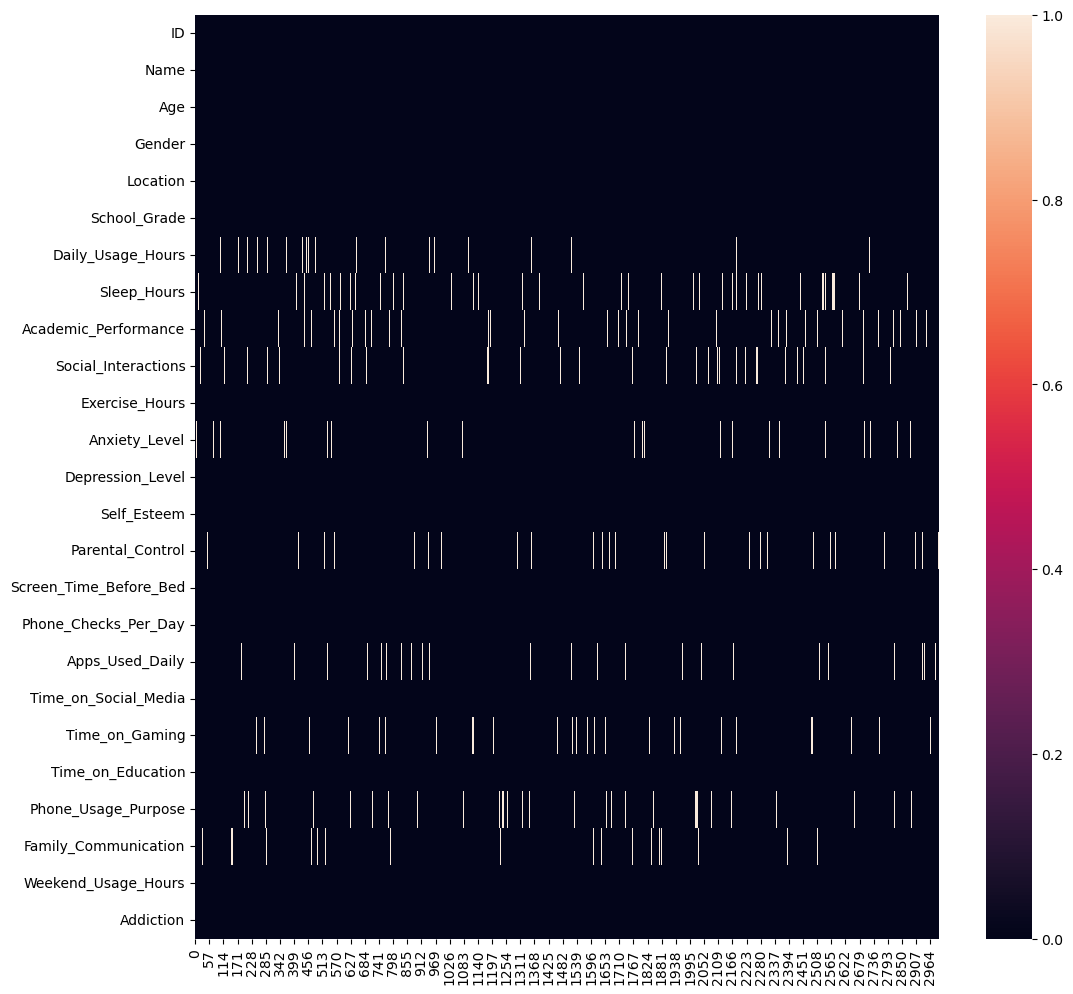

In [5]:
plt.figure(figsize = (12, 12))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data = df))
plt.show()

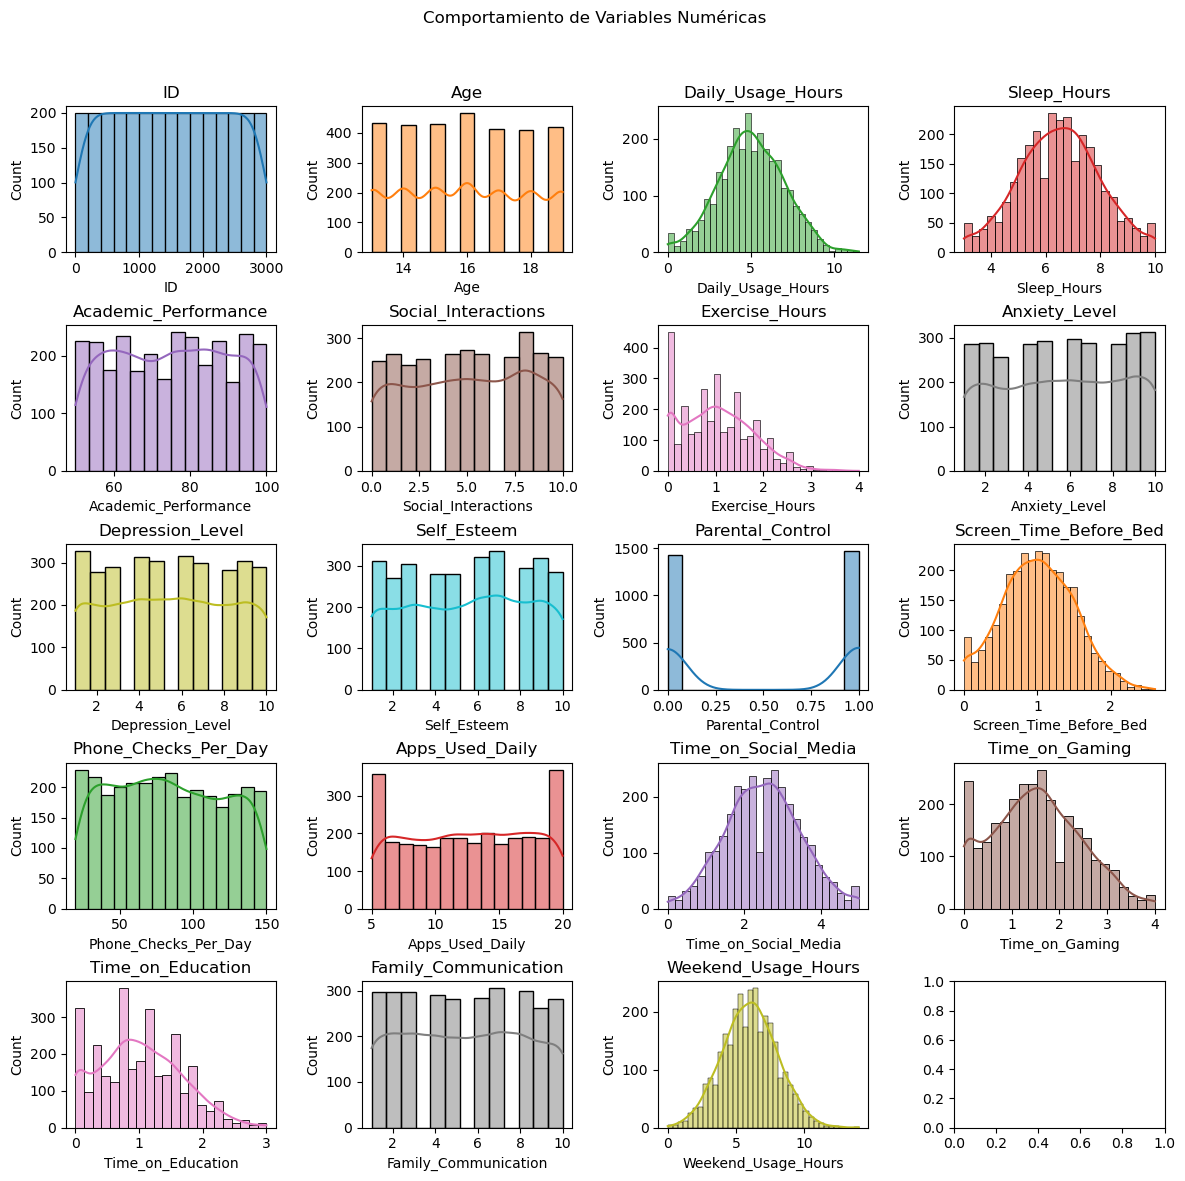

In [6]:
#Exploración univariada de los datos
##Para datos numéricos: histogramas de frecuencia
##Para datos categóricos: gráficos de torta

###HISTOGRAMAS DE FRECUENCIA
fig, ax = plt.subplots(5, 4, figsize = (12, 12))
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()


- multimodales no parametricas son las que so cuadradas/uniformes con varias modas
- Las vaeiables con huecos se pueden ver que es por ser valores enteros 0-5, 1-10, etc
- Sería muy raro tener un comportamiento diferente en las variables de tiempo, por ejemplo entre time on social o time gaming en relación a time total usage
- La edad puede que no nos aparte mucha información pero nos ayuda a controlar el modelo 
- El Id no nos sirve 

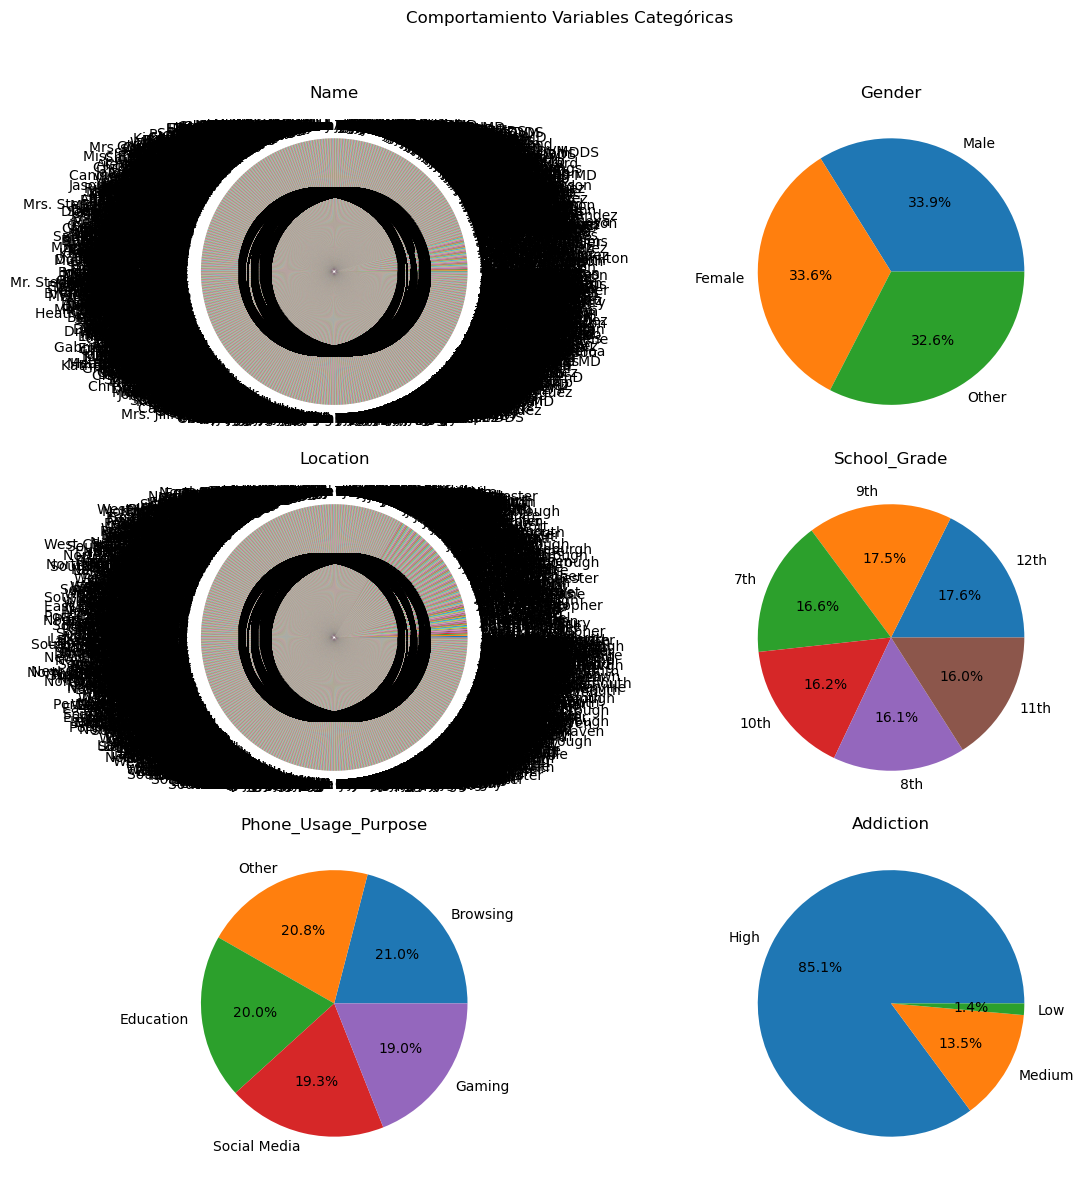

In [7]:
##GRÁFICOS DE TORTA
fig, ax = plt.subplots(3, 2, figsize = (12, 12))
ax = ax.flat
cat_col = data.select_dtypes(include = ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x = data[col].value_counts(), labels = data[col].value_counts().index, autopct = '%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle("Comportamiento Variables Categóricas")
plt.show()

- Las variables de ubicación y el nombre no son útiles para este caso especifico
- Si en los requerimientos del negocio tenemos necesidades de locación si deberíamos ver como manipular la variable 
- La adicción es una variable desbalanceada, no se debe elminar ya que es nuestra variable Y, entonces la debemos balancear, equidistribuida 
  - LLevar la alta al tamaño de la media o baja, pero para esto deberíamos eliminar datos (SubSampling)
  - LLevar la media y baja a la alta, crear los datos(OverSampling)
    - Se pueden replicar individuos existentes 
    - Se pueden usar las funciónes de probabilidad de las variables para genrear nuevos datos 


In [ ]:
##Gráfico de barras para variables categóricas
fig, ax = plt.subplots(1, 2, figsize = (20, 20))
ax = ax.flat

col = data[['Name', 'Location']]
for i, col in enumerate(col):
    data[col].value_counts().plot.barh(ax = ax[i])
    ax[i].set_title(col)

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Categóricas')
plt.show()

# **6. Preparación de los Datos**

- Eliminar variables que no son significativas
- Completar variables que cuentan con datos nulos
- Balancear TODOS LOS DATOS O SOLO ENTRENAMIENTO ES MÁS FACÍL BALANCEAR TODO
- Transformar los datos para que sean usables por el modelo
- Separar en conjuntos de entrenamiento y prueba


In [9]:
# vamos a eliminar la variables no identificativas 
dataMod = data.drop(columns = ['ID', 'Name', 'Location','Age' ])
dataMod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   object 
 1   School_Grade            3000 non-null   object 
 2   Daily_Usage_Hours       2900 non-null   float64
 3   Sleep_Hours             2900 non-null   float64
 4   Academic_Performance    2900 non-null   float64
 5   Social_Interactions     2900 non-null   float64
 6   Exercise_Hours          3000 non-null   float64
 7   Anxiety_Level           2900 non-null   float64
 8   Depression_Level        3000 non-null   int64  
 9   Self_Esteem             3000 non-null   int64  
 10  Parental_Control        2900 non-null   float64
 11  Screen_Time_Before_Bed  3000 non-null   float64
 12  Phone_Checks_Per_Day    3000 non-null   int64  
 13  Apps_Used_Daily         2900 non-null   float64
 14  Time_on_Social_Media    3000 non-null   

- Completaremos las entradas con campos nulos primero la simple y luego por modelo
- simple tiene dos formas, constante(valor fijo) o por medidas de tendencia central(dependen de la var)
pd.fillna
  - Si la var es numerica imputamos por media o mediana 
  - La media se ve sesgada por valores extremos 
  - La mediana es posicional
  - Si es categorica imputamos por moda 
LA IMPUTACION CON MTC PUEDEN ENGAÑAR AL MODELO OJO
- Modelo(regresión, para las cat debemos codificar y descodificar)
  - Vecindad: Se completan con la media de los n vecinos del nulo
  - Recursivo: Imputación por medida de tendecia central inicialmente, luego elije una columna a completar, vuelve a poner el nulo y recalcula con un nuevo modelo para completar el nulo de esa columna, luego sigue con las otras, dentro del recursivo funcionan bien la regresiones lineales pero el mejro en terminos de presición son los randomForest 

Transformar de manera ordinal las variables categoricas con miras a imputar 

In [10]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
catCol = dataMod.select_dtypes(include = ['object']).columns
categorical_transformer = make_column_transformer((OrdinalEncoder(), catCol), remainder = 'passthrough')
categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['Gender', 'School_Grade', 'Phone_Usage_Purpose', 'Addiction'], dtype='object'))])

In [11]:
data_transofrmed = pd.DataFrame(categorical_transformer.fit_transform(dataMod),
             columns = categorical_transformer.get_feature_names_out(),
             index = dataMod.index).rename(columns= lambda x: x.removeprefix('ordinalencoder__')).rename(columns= lambda x: x.removeprefix('remainder__'))

In [12]:
#imput vecindad 
knn_imputer = sklearn.impute.KNNImputer(n_neighbors = 10) # 10 vecinos arbitrarios

data_knn_df = pd.DataFrame(knn_imputer.fit_transform(data_transofrmed),
             columns = data_transofrmed.columns,
             index = data_transofrmed.index)

data_knn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   float64
 1   School_Grade            3000 non-null   float64
 2   Phone_Usage_Purpose     3000 non-null   float64
 3   Addiction               3000 non-null   float64
 4   Daily_Usage_Hours       3000 non-null   float64
 5   Sleep_Hours             3000 non-null   float64
 6   Academic_Performance    3000 non-null   float64
 7   Social_Interactions     3000 non-null   float64
 8   Exercise_Hours          3000 non-null   float64
 9   Anxiety_Level           3000 non-null   float64
 10  Depression_Level        3000 non-null   float64
 11  Self_Esteem             3000 non-null   float64
 12  Parental_Control        3000 non-null   float64
 13  Screen_Time_Before_Bed  3000 non-null   float64
 14  Phone_Checks_Per_Day    3000 non-null   

In [17]:
# Imputación de recursiva 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# recursive_imputer = IterativeImputer(estimator = RandomForestRegressor(n_estimators = 100, random_state = 42),



recursive_imputer = IterativeImputer(estimator = LinearRegression(),
                                                    initial_strategy = 'mean',
                                                    max_iter = 10)
data_recursive_df = pd.DataFrame(recursive_imputer.fit_transform(data_transofrmed),
             columns = data_transofrmed.columns,
             index = data_transofrmed.index)

data_recursive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  3000 non-null   float64
 1   School_Grade            3000 non-null   float64
 2   Phone_Usage_Purpose     3000 non-null   float64
 3   Addiction               3000 non-null   float64
 4   Daily_Usage_Hours       3000 non-null   float64
 5   Sleep_Hours             3000 non-null   float64
 6   Academic_Performance    3000 non-null   float64
 7   Social_Interactions     3000 non-null   float64
 8   Exercise_Hours          3000 non-null   float64
 9   Anxiety_Level           3000 non-null   float64
 10  Depression_Level        3000 non-null   float64
 11  Self_Esteem             3000 non-null   float64
 12  Parental_Control        3000 non-null   float64
 13  Screen_Time_Before_Bed  3000 non-null   float64
 14  Phone_Checks_Per_Day    3000 non-null   

In [18]:
data_recursive_df 

,Gender,School_Grade,Phone_Usage_Purpose,Addiction,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,...,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours
0,0.0,5.0,0.000000,0.0,4.0,6.1,78.0,5.0,0.1,10.0,...,8.0,0.000000,1.4,86.0,19.0,3.6,1.700000,1.2,4.0,8.7
1,0.0,3.0,0.000000,0.0,5.5,6.5,70.0,5.0,0.0,3.0,...,3.0,0.000000,0.9,96.0,9.0,1.1,4.000000,1.8,2.0,5.3
2,2.0,1.0,1.000000,0.0,5.8,5.5,93.0,8.0,0.8,2.0,...,10.0,0.502943,0.5,137.0,8.0,0.3,1.500000,0.4,6.0,5.7
3,0.0,2.0,4.000000,0.0,3.1,3.9,78.0,8.0,1.6,9.0,...,3.0,0.000000,1.4,128.0,7.0,3.1,1.600000,0.8,8.0,3.0
4,2.0,5.0,2.000000,0.0,2.5,6.7,56.0,4.0,1.1,1.0,...,1.0,0.000000,1.0,96.0,20.0,2.6,0.900000,1.1,10.0,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,2.0,2.179744,0.0,3.9,6.4,53.0,4.0,0.9,7.0,...,2.0,1.000000,0.3,80.0,15.0,2.7,1.800000,1.0,8.0,9.4
2996,0.0,4.0,2.000000,2.0,3.6,7.3,93.0,5.0,0.0,8.0,...,9.0,1.000000,0.9,45.0,8.0,3.1,0.000000,0.3,9.0,5.2
2997,2.0,3.0,4.000000,2.0,3.2,6.5,98.0,1.0,0.0,4.0,...,9.0,0.549853,0.2,51.0,13.0,2.4,0.200000,2.4,9.0,5.9
2998,0.0,5.0,0.000000,0.0,6.7,7.5,67.0,3.0,0.2,3.0,...,9.0,0.000000,1.6,125.0,17.0,1.7,2.600000,1.5,4.0,6.1


#### Devolvemos de la codificación a las variables originales 

In [15]:
data_imputed  = data_recursive_df.copy()
data_imputed[catCol] = (categorical_transformer.named_transformers_.ordinalencoder.inverse_transform(X= data_recursive_df[catCol]))
data_imputed

,Gender,School_Grade,Phone_Usage_Purpose,Addiction,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,...,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours
0,Female,9th,Browsing,High,4.0,6.1,78.0,5.0,0.1,10.0,...,8.0,0.000000,1.4,86.0,19.0,3.6,1.700000,1.2,4.0,8.7
1,Female,7th,Browsing,High,5.5,6.5,70.0,5.0,0.0,3.0,...,3.0,0.000000,0.9,96.0,9.0,1.1,4.000000,1.8,2.0,5.3
2,Other,11th,Education,High,5.8,5.5,93.0,8.0,0.8,2.0,...,10.0,0.502943,0.5,137.0,8.0,0.3,1.500000,0.4,6.0,5.7
3,Female,12th,Social Media,High,3.1,3.9,78.0,8.0,1.6,9.0,...,3.0,0.000000,1.4,128.0,7.0,3.1,1.600000,0.8,8.0,3.0
4,Other,9th,Gaming,High,2.5,6.7,56.0,4.0,1.1,1.0,...,1.0,0.000000,1.0,96.0,20.0,2.6,0.900000,1.1,10.0,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Female,12th,Gaming,High,3.9,6.4,53.0,4.0,0.9,7.0,...,2.0,1.000000,0.3,80.0,15.0,2.7,1.800000,1.0,8.0,9.4
2996,Female,8th,Gaming,Medium,3.6,7.3,93.0,5.0,0.0,8.0,...,9.0,1.000000,0.9,45.0,8.0,3.1,0.000000,0.3,9.0,5.2
2997,Other,7th,Social Media,Medium,3.2,6.5,98.0,1.0,0.0,4.0,...,9.0,0.549853,0.2,51.0,13.0,2.4,0.200000,2.4,9.0,5.9
2998,Female,9th,Browsing,High,6.7,7.5,67.0,3.0,0.2,3.0,...,9.0,0.000000,1.6,125.0,17.0,1.7,2.600000,1.5,4.0,6.1


#### Balancear a Y

- SubSampling: Llevar la o las clases de mayor frecuencia al tamaño de la menor frecuencia 
  - la eliminación se usa sobretodo en big data donde no se pierden las dinamicas de los datos
- OverSampling: Llevar las clases de menor frecuencia al tamaño de la mayor 
  - De forma aleatoria (replicación)
  - FDP / FMP / Smote / SmoteTonek

##### **Para la replicación debemos terminar el modelo y medir rendimiento para verificar cual da mejor**
##### **Solo balanceamos en CLASIFICACIÓN**



In [21]:
# Haremos oversampling 

data_high = data_imputed[data_imputed['Addiction'] == 'High']
data_medium = data_imputed[data_imputed['Addiction'] == 'Medium']
data_low = data_imputed[data_imputed['Addiction'] == 'Low']

print(f"High: {data_high.shape}, Medium: {data_medium.shape}, Low: {data_low.shape[0]}")

High: (2554, 21), Medium: (404, 21), Low: 42


Como podemos ver los medium y lows tienen una población más baja, por ende el modelo no sería capaz de identificar patrones para hacer la clasificación, entonces por eso las aumentaremos 

In [ ]:
#hacemos replicación de los medium y low a la cantidad de los high
data_medium_rem = data_medium.sample(n = data_high.shape[0], replace = True)
data_low_rem = data_low.sample(n = data_high.shape[0], replace = True)

data_balanced = pd.concat([data_high, data_medium_rem, data_low_rem]) 
data_balanced.reset_index(drop = True, inplace = True)
data_balanced.info()
print(f"High: {data_high.shape}, Medium: {data_medium.shape}, Low: {data_low.shape[0]}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  7662 non-null   object 
 1   School_Grade            7662 non-null   object 
 2   Phone_Usage_Purpose     7662 non-null   object 
 3   Addiction               7662 non-null   object 
 4   Daily_Usage_Hours       7662 non-null   float64
 5   Sleep_Hours             7662 non-null   float64
 6   Academic_Performance    7662 non-null   float64
 7   Social_Interactions     7662 non-null   float64
 8   Exercise_Hours          7662 non-null   float64
 9   Anxiety_Level           7662 non-null   float64
 10  Depression_Level        7662 non-null   float64
 11  Self_Esteem             7662 non-null   float64
 12  Parental_Control        7662 non-null   float64
 13  Screen_Time_Before_Bed  7662 non-null   float64
 14  Phone_Checks_Per_Day    7662 non-null   

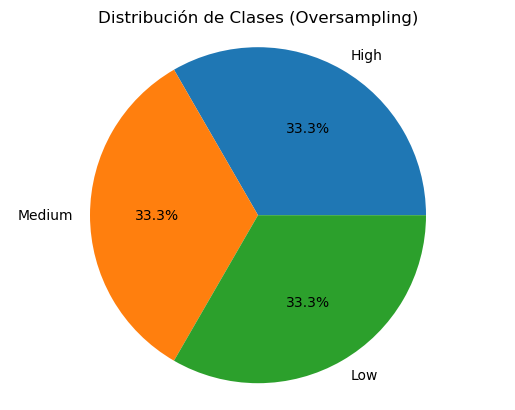

In [ ]:
plt.pie(x = data_balanced['Addiction'].value_counts(),
        labels = data_balanced['Addiction'].value_counts().index,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribución de Clases (Oversampling)')
plt.show()


In [ ]:
X = data_balanced.drop(columns = ['Addiction'])
y = data_balanced[['Addiction']]

print(f'el tamaño de X es: {X.shape}, el tamaño de y es: {y.shape}')

el tamaño de X es: (7662, 20), el tamaño de y es: (7662, 1)


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_col = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_col = X.select_dtypes(include = ['object']).columns.to_list()


num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
categorical_transformer = Pipeline( steps = [('encoder', OneHotEncoder())])
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_col),
                                                  ('cat', categorical_transformer, cat_col)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Daily_Usage_Hours', 'Sleep_Hours',
                                  'Academic_Performance', 'Social_Interactions',
                                  'Exercise_Hours', 'Anxiety_Level',
                                  'Depression_Level', 'Self_Esteem',
                                  'Parental_Control', 'Screen_Time_Before_Bed',
                                  'Phone_Checks_Per_Day', 'Apps_Used_Daily',
                                  'Time_on_Social_Media', 'Time_on_Gaming',
                                  'Time_on_Education', 'Family_Communication',
                                  'Weekend_Usage_Hours']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Gender', 'School_Grade',
                                  'Phone_Usage_Purpose'])])

In [30]:
x_pre = preprocessor.fit_transform(X)
codCat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col, codCat])
x_pro  = pd.DataFrame(x_pre, columns = labels)
x_pro.head()

,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,...,School_Grade_11th,School_Grade_12th,School_Grade_7th,School_Grade_8th,School_Grade_9th,Phone_Usage_Purpose_Browsing,Phone_Usage_Purpose_Education,Phone_Usage_Purpose_Gaming,Phone_Usage_Purpose_Other,Phone_Usage_Purpose_Social Media
0,0.347826,0.442857,0.56,0.5,0.025,1.000000,0.222222,0.777778,0.000000,0.538462,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.478261,0.500000,0.40,0.5,0.000,0.222222,0.666667,0.222222,0.000000,0.346154,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.504348,0.357143,0.86,0.8,0.200,0.111111,0.222222,1.000000,0.502943,0.192308,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.269565,0.128571,0.56,0.8,0.400,0.888889,1.000000,0.222222,0.000000,0.538462,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.217391,0.528571,0.12,0.4,0.275,0.000000,0.444444,0.000000,0.000000,0.384615,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


##### **Separamos el df para el entrenamiento**

el tamaño de X_train es: (5363, 31), el tamaño de X_test es: (2299, 31)
el tamaño de y_train es: (5363, 1), el tamaño de y_test es: (2299, 1)


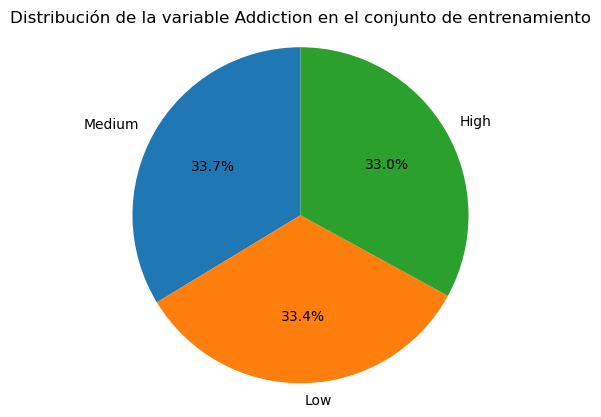

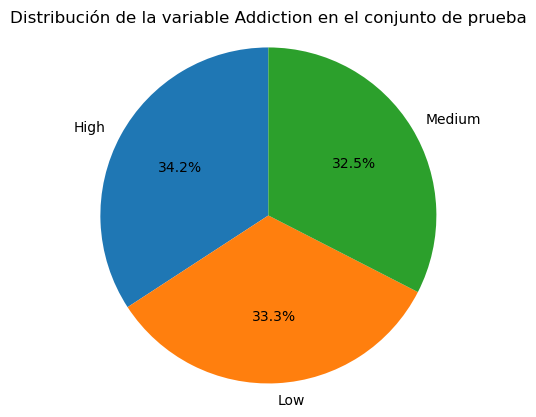

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_pro, y, test_size=0.3, random_state=123)

print(f'el tamaño de X_train es: {X_train.shape}, el tamaño de X_test es: {X_test.shape}')
print(f'el tamaño de y_train es: {Y_train.shape}, el tamaño de y_test es: {Y_test.shape}')

plt.pie(x = Y_train['Addiction'].value_counts(),
        labels = Y_train['Addiction'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90)
plt.axis('equal')
plt.title('Distribución de la variable Addiction en el conjunto de entrenamiento')
plt.show()

plt.pie(x = Y_test['Addiction'].value_counts(),
        labels = Y_test['Addiction'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90)
plt.axis('equal')
plt.title('Distribución de la variable Addiction en el conjunto de prueba')
plt.show()


#### Modelos De Clasificación 
 - RegLogistica
 - K vecinos más cercanos 
 - Naive bayes
 - Máquinas de soporte vectorial 
 - Arboles de decisión 
 - Random Forest 
 - Adaptative boosting 
 - Gradient boosting 
 - Redes Neuronales percepción multicapa 

 **Busqueda de híperparametros con validación cruzada**
 Queremos evitar el sobreajuste  
 Los modelos pueden estar en tres estados  
 - Ajustado
    - Cuando el desempeño de entrenamiento y validaión son similares y cercanos a 1 (acuraccy)
 - SubAjustado
   -  Cuando el desempeño de entrenamiento y validaión son similares y cercanos a 0
 - SobreAjustado
    -  Cuando el desempeño de entrenamiento es mucho mayor que el de validaión, (20%)  

**El desempeño de clasificación**
- Matriz de confusión  (VP, VN, FP, FN)
  0: positivo, 1: negativo
  VN + VP >> FP + FN  
- Accuracy: Verdades totales / Total
- Precisión: VP / VP + FN :  Vp en relación a los falsos negativos 
- Recall: VP / VP + FP:  Vp en relación a los falsos positivos


